In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from colorama import Fore as f, Back as b, Style as s



%matplotlib inline 
#disp graphs in line

plt.rcParams["figure.figsize"] = (8, 6) #set defualt grpah size

In [2]:
spdf = pd.read_csv("sup_data_viz.csv", parse_dates = ["FIRST_YEAR"]) #read data frame as csv and sort by first year
#spdf.head() #Check file i/o.

def pBreak():
    print("")
    print(b.RED+"============================================================================================================")
    print("")

# The following graphs are designed to show the percentages of male vs female charcters within the DC & Marvel cinematic universes.

Descriptions of the graphs are printed in blue and correlations or anaylsis in green.



First i'll show the percentages of hereos between the marvel and dc universes as a pi chart.
Allowing us to get familar with the data set:



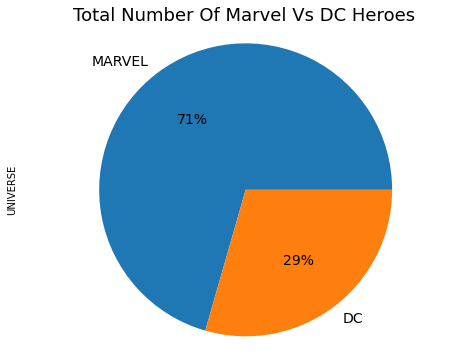

The overall percentage of Marvel vs DC heroes is:
-71% Marvel
-29% DC
What does this mean?
-It means that the Marvel Cinematic Universe (MCU) is large then the DC one.
-Additionally this indicates that Marvel likely has greater market share within industry.


Second a pi graph to show the overall percentage of male vs female charcters:



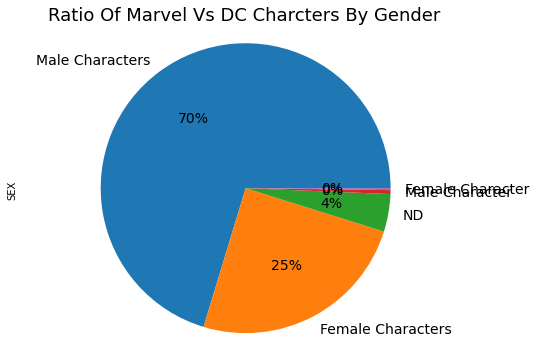

The overall percentage of male to female charcters within both universes is:
-70% Male 
-25% Female 
-5% other genders /no data/ mistypes
What does this mean?
It means that male superheroes generally represent the majority of both cinematic universes.





In [3]:
pBreak()

print(b.BLUE+"First i'll show the percentages of hereos between the marvel and dc universes as a pi chart.\nAllowing us to get familar with the data set:\n")

utypes = ['Marvel', 'DC'] 
#lables for pi chart 1
uCount = spdf["UNIVERSE"].value_counts()
#count number of heros in each universe and convert it to a list 

uCount.plot(kind = "pie", autopct = "%1.0f%%", subplots = True, fontsize = 14)
plt.title("Total Number Of Marvel Vs DC Heroes", fontsize = 18)
plt.axis("equal")
plt.show()

print(b.GREEN+"The overall percentage of Marvel vs DC heroes is:\n-71% Marvel\n-29% DC")
print(b.GREEN+"What does this mean?\n-It means that the Marvel Cinematic Universe (MCU) is large then the DC one.\n-Additionally this indicates that Marvel likely has greater market share within industry.")


pBreak()


print(b.BLUE+"Second a pi graph to show the overall percentage of male vs female charcters:\n")



gAgender = spdf.drop(spdf[spdf.SEX == "Agender Characters"].index) 
#remove a gender chars
gLess = gAgender.drop(gAgender[gAgender.SEX == "Genderless Characters"].index)
#remove gender less chars
gFuild = gLess.drop(gLess[gLess.SEX == "Genderfluid Characters"].index)
#remove gender less chars
gTrans = gFuild.drop(gFuild[gFuild.SEX == "Transgender Characters"].index)
#remove gender fluid chars
fMisType = gTrans.drop(gTrans[gTrans.SEX == "Female Charcter"].index)
#remove mistypes of female charcters
mMisType = fMisType.drop(fMisType[fMisType.SEX == "Male Charcter"].index)
#remove mistypes of male charcters

#The above lines clean the data and drop irrelevant infromation

MF = mMisType
#our final set of Male Vs Female Charcters

countsMF = MF["SEX"].value_counts()


# The counting the occurencings of MF in the sex column


countsMF.plot(kind = "pie", autopct = "%1.00f%%", subplots = True, fontsize = 14) #plot values
#specify the plot type as pie, autopct for precentages, subplots, 
plt.title("Ratio Of Marvel Vs DC Charcters By Gender", fontsize = 18) #label title w/ larger font.
plt.axis("equal") #place large percentages first then smaller ones last

plt.show() #show plot

print(b.GREEN+"The overall percentage of male to female charcters within both universes is:\n-70% Male \n-25% Female \n-5% other genders /no data/ mistypes")
print(b.GREEN+"What does this mean?\nIt means that male superheroes generally represent the majority of both cinematic universes.\n")
pBreak()





Third putting into perspective with rates of introduction with respect to time:



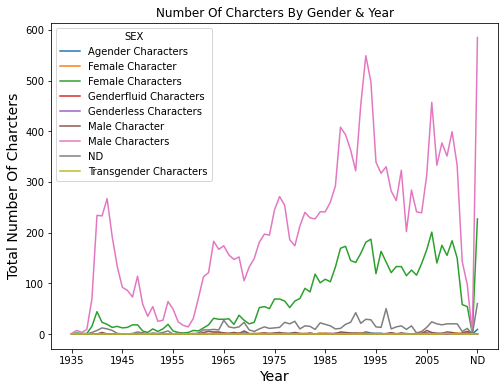

Notice the overall uptake in female charcters from 1955 to 2005.
This trend is indicative of future parity between genders.
This prediction could be modeled using keras and tensorflow 
 (to confirm the intution) but that is far outside of the scope of this project.
I would say is overall parity is postive since nearly half of the worlds population isn't represented currently.


Fourth show the gender of a charcter vs their general affiliation:


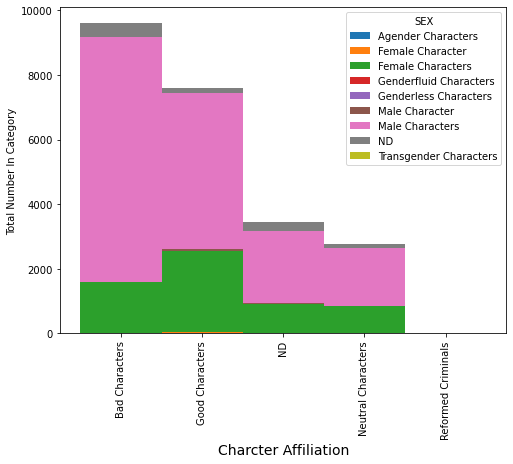

This graph shows that the overwhelming majority of good and bad charcters are male 
(which makes sense in the context of the other graphs).
Another interesting correlation showing is that it's more likely for a charcter to be good if that charcter is also female.




In [11]:
pBreak()
print(b.BLUE+"Third putting into perspective with rates of introduction with respect to time:\n"+s.RESET_ALL)

fYear = spdf['FIRST_YEAR']
genders = spdf['SEX']

appByGen = pd.crosstab(fYear, genders) 

appByGen.plot()
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Total Number Of Charcters", fontsize = 14)
plt.title("Number Of Charcters By Gender & Year")
plt.show()

print(b.GREEN+"Notice the overall uptake in female charcters from 1955 to 2005.\nThis trend is indicative of future parity between genders.\nThis prediction could be modeled using keras and tensorflow \n (to confirm the intution) but that is far outside of the scope of this project.\nI would say is overall parity is postive since nearly half of the worlds population isn't represented currently.")

pBreak()

print(b.BLUE+"Fourth show the gender of a charcter vs their general affiliation:")

align = spdf['ALIGN']
AlignByGender = pd.crosstab(align, genders) 

AlignByGender.plot(kind = "bar", stacked=True, subplots = False, width = 1)
plt.xlabel("Charcter Affiliation", fontsize = 14)
plt.ylabel("Total Number of Charcters")
plt.show()

print(b.GREEN +"This graph shows that the overwhelming majority of good and bad charcters are male \n(which makes sense in the context of the other graphs).\nAnother interesting correlation showing is that it's more likely for a charcter to be good if that charcter is also female.")
pBreak()